In [1]:
from matplotlib import pyplot as plt
import numpy as np

Modular exponentiation is periodic:


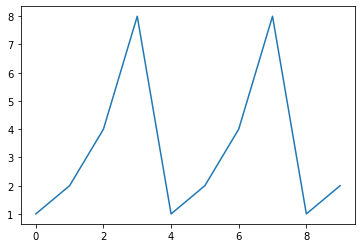

In [11]:
N = 5*3
x = 2

#modular exponentiation
def mod_exp(N,x,r):
    return ((x**r)%N)

print("Modular exponentiation is periodic:")
rs = np.arange(10)
plt.plot(rs, mod_exp(N,x,rs))

The period for x= 2 and N= 15  is:  4


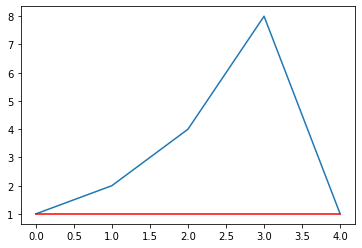

In [12]:
#returns period and x^r mod N across period
def period_finding(N, x):
    
    r=0
    rs=[]
    period=0
    period_found = False
    modular_exp=[]
    
    e = (x**r)%N
    modular_exp.append(e)
    rs.append(r)
    
    while not period_found:
        
        r+=1
        e = (x**r)%N
        modular_exp.append(e)
        rs.append(r)
        if e==1:
            period_found = True
            period = r
        
        
    return period, rs, modular_exp
        
period, rs, e = period_finding(N,x)
print("The period for x=",x ,"and N=", N, " is: ", period)
plt.plot(rs, e)
plt.plot(rs, np.ones(len(rs)), color="red")

## Order finding

We want to find the period of $x^r \pmod{N}$.
The quantum algorithm for order/period finding:

1. choose $l$ such that $N^2 \leq 2^l \leq 2 N^2$ and initialize two registers $Q_1$ and $Q_2$ composed of $l$ qubits each
2. apply $l$ Hadamard gates to obtain superposition of all computational basis states in $Q_1$
3. apply oracle $U_f$, which writes the result of the modular exponentiation into $Q_2$
4. apply the quantum fourier transform (QFT) to $Q_1$
5. measure $Q_1$ saving the result $c$ to a classical register

cite https://arxiv.org/pdf/1202.6614.pdf for hard coded oracle?

These steps conclude the quantum part of the order finding process. Next we need to check the result classically and with a small probability we will have to run the algorithm again, because it returned a wrong result.


The classical part works as follows:

1. compute $r= \frac{q}{\gcd(c,q)}$
2. check $x^r \pmod{N} = 1$ ?
3. on success return period $r$, on failure rerun the algorithm

In [4]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, Aer
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors.standard_errors import kraus_error

In [24]:
#factorize 15
N = 15

### 1. choose l and initialize
#N^2 = 225 < 2^8 = 256
l = 8

#create Quantum Registers
q1 = QuantumRegister(8, 'q1')
q2 = QuantumRegister(8, 'q2')

#create Classical Register
c = ClassicalRegister(16, 'c')

#create Quantum Circuit
init = QuantumCircuit(q1, q2, c)

### 2. apply Hadamard gates
init.h(q1)
init.barrier()


### 3. apply oracle
#x=2
u_2 = QuantumCircuit(q1, q2, c)

u_2.x(q1[0])
u_2.x(q1[1])
u_2.ccx(q1[0],q1[1],q2[0])
u_2.x(q1[1])
u_2.x(q1[0])

u_2.x(q1[1])
u_2.ccx(q1[0],q1[1],q2[1])
u_2.x(q1[1])

u_2.x(q1[0])
u_2.ccx(q1[0],q1[1],q2[2])
u_2.x(q1[0])

u_2.ccx(q1[0],q1[1],q2[3])

u_2.barrier()

#x=4
u_3 = QuantumCircuit(q1, q2, c)

u_3.x(q1[0])
u_3.cx(q1[0],q2[0])
u_3.x(q1[0])

u_3.cx(q1[0],q2[2])

u_3.barrier()

#x=7
u_7 = QuantumCircuit(q1, q2, c)

u_7.x(q2[0])
u_7.x(q2[2])

u_7.x(q1[0])
u_7.ccx(q1[0],q1[1],q2[0])
u_7.x(q1[0])

u_7.x(q1[1])
u_7.ccx(q1[0],q1[1],q2[1])
u_7.x(q1[1])

u_7.x(q1[0])
u_7.x(q1[1])
u_7.ccx(q1[0],q1[1],q2[2])
u_7.x(q1[1])
u_7.x(q1[0])

u_7.ccx(q1[0],q1[1],q2[3])

u_7.barrier()

#x=8
u_8 = QuantumCircuit(q1, q2, c)

u_8.x(q1[0])
u_8.x(q1[1])
u_8.ccx(q1[0],q1[1],q2[0])
u_8.x(q1[1])
u_8.x(q1[0])

u_8.ccx(q1[0],q1[1],q2[1])

u_8.x(q1[0])
u_8.ccx(q1[0],q1[1],q2[2])
u_8.x(q1[0])

u_8.x(q1[1])
u_8.ccx(q1[0],q1[1],q2[3])
u_8.x(q1[1])

u_8.barrier()

#x=11
u_11 = QuantumCircuit(q1, q2, c)

u_11.x(q2[0])

u_11.cx(q1[0],q2[1])

u_11.cx(q1[0],q2[3])

u_11.barrier()

#x=13
u_13 = QuantumCircuit(q1, q2, c)

u_13.x(q2[0])

u_13.x(q2[2])

u_13.x(q1[0])
u_13.ccx(q1[0],q1[1],q2[0])
u_13.x(q1[0])

u_13.ccx(q1[0],q1[1],q2[1])

u_13.x(q1[0])
u_13.x(q1[1])
u_13.ccx(q1[0],q1[1],q2[2])
u_13.x(q1[1])
u_13.x(q1[0])

u_13.x(q1[1])
u_13.ccx(q1[0],q1[1],q2[3])
u_13.x(q1[1])

u_13.barrier()

#x=14
u_14 = QuantumCircuit(q1,q2,c)

u_14.x(q1[0])
u_14.cx(q1[0],q2[0])
u_14.x(q1[0])

u_14.cx(q1[0],q2[1])

u_14.cx(q1[0],q2[2])

u_14.cx(q1[0],q2[3])

u_14.barrier()

### 4. apply QFT

         ┌───┐     ┌───┐                ░ 
q1_0: |0>┤ X ├──■──┤ X ├──■────■────■───░─
         └───┘  │  └───┘  │    │    │   ░ 
q1_1: |0>───────┼─────────┼────┼────┼───░─
                │         │    │    │   ░ 
q1_2: |0>───────┼─────────┼────┼────┼───░─
                │         │    │    │   ░ 
q1_3: |0>───────┼─────────┼────┼────┼───░─
                │         │    │    │   ░ 
q1_4: |0>───────┼─────────┼────┼────┼───░─
                │         │    │    │   ░ 
q1_5: |0>───────┼─────────┼────┼────┼───░─
                │         │    │    │   ░ 
q1_6: |0>───────┼─────────┼────┼────┼───░─
                │         │    │    │   ░ 
q1_7: |0>───────┼─────────┼────┼────┼───░─
              ┌─┴─┐       │    │    │   ░ 
q2_0: |0>─────┤ X ├───────┼────┼────┼───░─
              └───┘     ┌─┴─┐  │    │   ░ 
q2_1: |0>───────────────┤ X ├──┼────┼───░─
                        └───┘┌─┴─┐  │   ░ 
q2_2: |0>────────────────────┤ X ├──┼───░─
                             └───┘┌─┴─┐ ░ 
q2_3: |0>──